# Priority 3 Packages for MAST TIKE

In [1]:
import keras
import tensorflow
import torch
import exoplanet
import jax
import starry


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
#keras and tensorflow
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [4]:
#pytorch
from __future__ import print_function
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.6213, 0.9431, 0.5183],
        [0.6432, 0.3469, 0.8067],
        [0.4140, 0.2566, 0.7232],
        [0.3172, 0.6311, 0.5173],
        [0.0397, 0.4855, 0.5592]])


In [5]:
#tensor flow
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

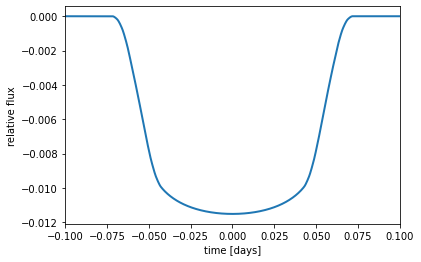

In [6]:
#Exoplanet which relys on Theano (I never got this to install correctly)
import numpy as np
import matplotlib.pyplot as plt

import exoplanet as xo

# The light curve calculation requires an orbit
orbit = xo.orbits.KeplerianOrbit(period=3.456)

# Compute a limb-darkened light curve using starry
t = np.linspace(-0.1, 0.1, 1000)
u = [0.3, 0.2]
light_curve = (
    xo.LimbDarkLightCurve(u).get_light_curve(orbit=orbit, 
                                             r=0.1, t=t, texp=0.02).eval()
)
# Note: the `eval` is needed because this is using Theano in
# the background

plt.plot(t, light_curve, color="C0", lw=2)
plt.ylabel("relative flux")
plt.xlabel("time [days]")
_ = plt.xlim(t.min(), t.max())

In [7]:
#jax
import jax.numpy as np
from jax import grad, jit, vmap
from jax import random
key = random.PRNGKey(0)
x = random.normal(key, (10,))
print(x)


[-0.372111    0.2642311  -0.18252774 -0.7368198  -0.44030386 -0.15214427
 -0.6713536  -0.59086424  0.73168874  0.56730247]


In [8]:
size = 3000
x = random.normal(key, (size, size), dtype=np.float32)
%timeit np.dot(x, x.T).block_until_ready()  # runs on the GPU

319 ms ± 17.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
from jax import device_put
import numpy as onp  # original CPU-backed NumPy
x = onp.random.normal(size=(size, size)).astype(onp.float32)
x = device_put(x)
%timeit np.dot(x, x.T).block_until_ready()

262 ms ± 6.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Pre-computing some matrices... INFO:starry.ops:Pre-computing some matrices... 
Done.
INFO:starry.ops:Done.
Compiling `render`... INFO:starry.ops:Compiling `render`... 
Done.
INFO:starry.ops:Done.


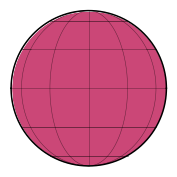

In [10]:
#starry -- same problem as exoplanet.  Exoplanet depends on starry.
import starry

starry.config.lazy = False

map = starry.Map(ydeg=5)
map.show()

In [11]:
map.intensity(lat=0, lon=0)

Compiling `intensity`... INFO:starry.ops:Compiling `intensity`... 
Done.
INFO:starry.ops:Done.


array([0.31830989])